In [1594]:
import pandas as pd
import numpy as np

In [1595]:
data = pd.read_csv('../titanic/train.csv')

In [1596]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 177 null values for 'Age'
* 687 null values for 'Cabin'
* 2 null values for 'Embarked'

In [1598]:
x = data.loc[data['Cabin'].notnull() == True]
x[['Cabin', 'Pclass']]

,Cabin,Pclass
1,C85,1
3,C123,1
6,E46,1
10,G6,3
11,C103,1
...,...,...
871,D35,1
872,B51 B53 B55,1
879,C50,1
887,B42,1


In [1599]:
cabinas = np.array(x['Cabin'])
cabinas

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


In [1600]:
cabinas_sorted = []
cabinas_type = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [1601]:
for cabina in cabinas:
    for cabina_type in cabinas_type:
        if cabina_type in cabina:
            cabinas_sorted.append(cabina_type)
            break

In [1602]:
cabin_x_class = pd.DataFrame(zip(cabinas_sorted, x['Pclass']), columns=['Cabin', 'Pclass'])

In [1603]:
cabin_x_class.loc[(cabin_x_class['Cabin'] == 'A') & (cabin_x_class['Pclass'] == 1)].shape[0]

15

In [1604]:
cabin_x_class.loc[(cabin_x_class['Cabin'] == 'A') & (cabin_x_class['Pclass'] == 2)].shape[0]

0

In [1605]:
class_x_cabin = pd.DataFrame()

In [1606]:
for j in cabinas_type:
    class_x_cabin[j] = [cabin_x_class.loc[(cabin_x_class['Cabin'] == j) & (cabin_x_class['Pclass'] == i)].shape[0]
                 for i in range(1, 4)]
    

In [1607]:
class_x_cabin

,A,B,C,D,E,F,G,T
0,15,47,59,29,25,0,0,1
1,0,0,0,4,4,8,0,0
2,0,0,0,0,4,4,4,0


In [1608]:
class_x_cabin.loc[0, 'A':'E'].describe()

count     5.000000
mean     35.000000
std      17.720045
min      15.000000
25%      25.000000
50%      29.000000
75%      47.000000
max      59.000000
Name: 0, dtype: float64

In [1610]:
import matplotlib.pyplot as plt

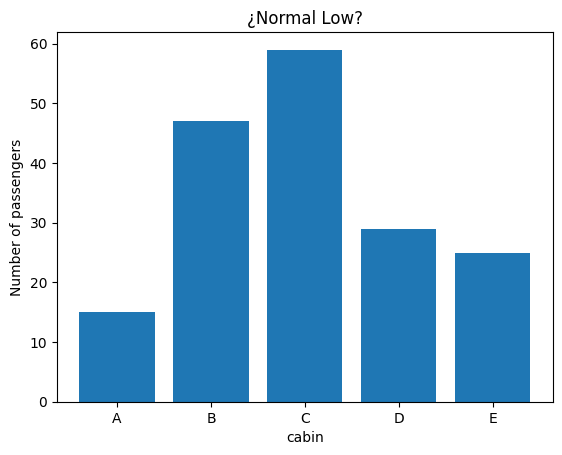

In [1612]:
class_ = ['A', 'B', 'C', 'D', 'E']
cabin_i = [15, 47, 59, 29, 25]
fig, ax = plt.subplots()
bar_labels = ['A', 'B', 'C', 'D', 'E']
ax.bar(class_, cabin_i, label=bar_labels)
ax.set_ylabel('Number of passengers')
ax.set_xlabel('cabin')
ax.set_title('¿Normal Low?')
plt.show()

In [1613]:
s = np.random.normal()

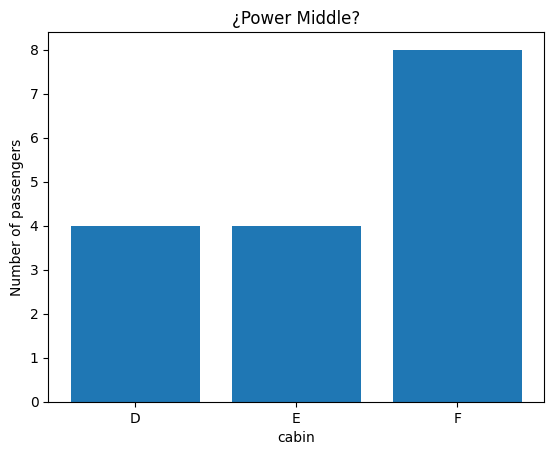

In [1614]:
class_ = ['D', 'E', 'F']
cabin_i = [4, 4, 8]
fig, ax = plt.subplots()
bar_labels = ['D', 'E', 'F']
ax.bar(class_, cabin_i, label=bar_labels)
ax.set_ylabel('Number of passengers')
ax.set_xlabel('cabin')
ax.set_title('¿Power Middle?')
plt.show()

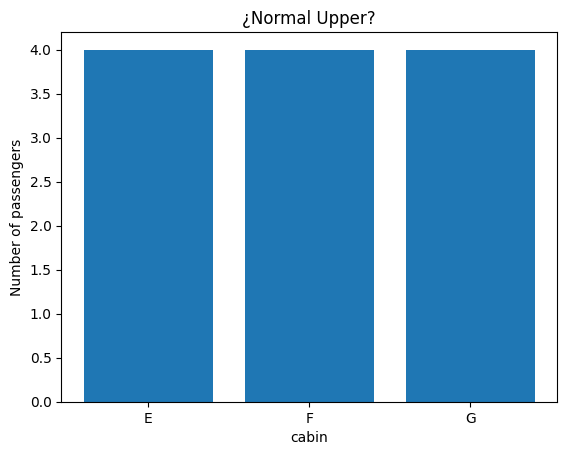

In [1615]:
class_ = ['E', 'F', 'G']
cabin_i = [4, 4, 4]
fig, ax = plt.subplots()
bar_labels = ['E', 'F', 'G']
ax.bar(class_, cabin_i, label=bar_labels)
ax.set_ylabel('Number of passengers')
ax.set_xlabel('cabin')
ax.set_title('¿Normal Upper?')
plt.show()

In [1616]:
def plot(l, m, u, cabin=''):
    class_ = ['Low', 'Middle', 'Upper']
    cabin_i = [l, m, u]
    fig, ax = plt.subplots()
    bar_labels = ['Low', 'Middle', 'Upper']
    bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
    ax.bar(class_, cabin_i, label=bar_labels, color=bar_colors)
    ax.set_ylabel('Number of passengers')
    ax.set_xlabel('Class')
    ax.set_title(f'Distribution of passengers in Cabin type {cabin}')
    plt.show()

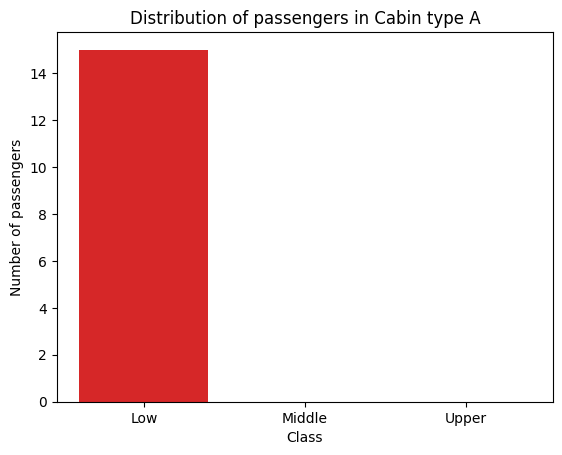

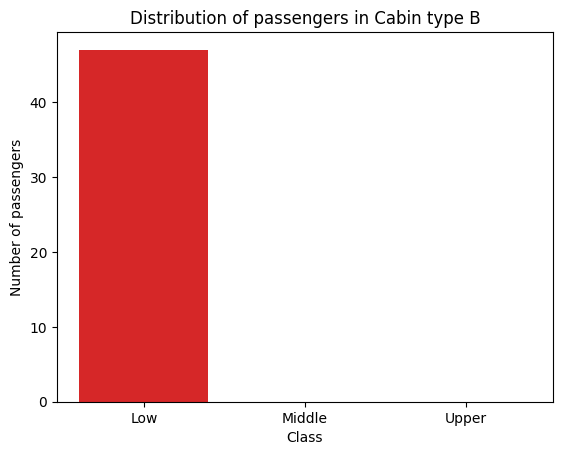

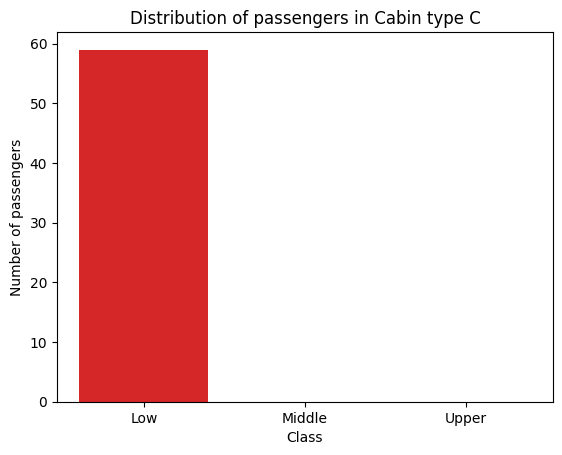

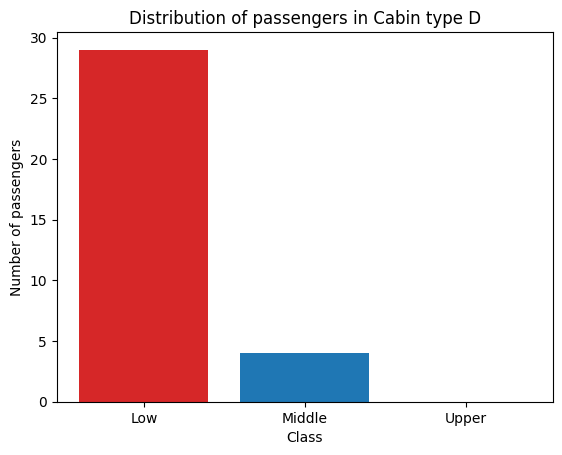

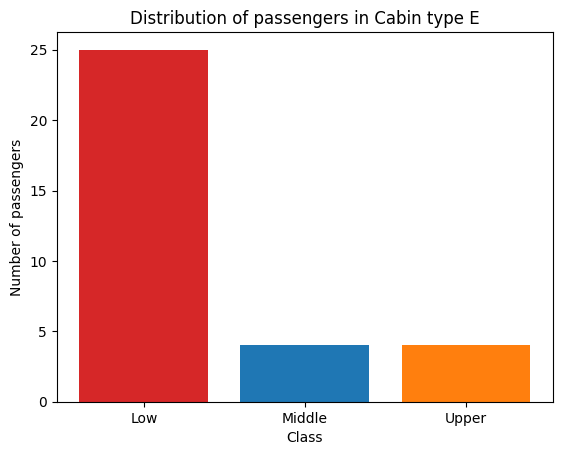

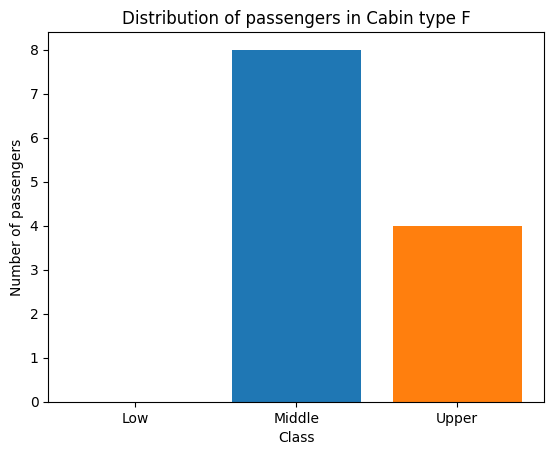

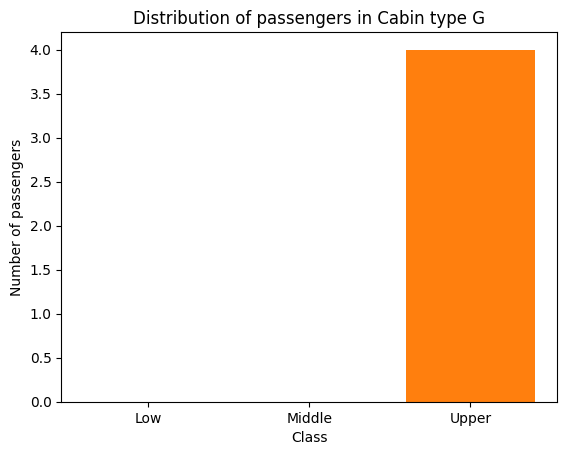

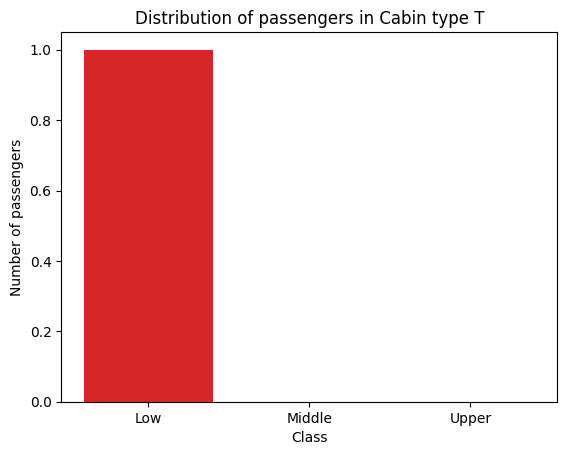

In [1617]:
for i in range(len(cabinas_type)):
    plot(class_x_cabin[cabinas_type[i]][0], class_x_cabin[cabinas_type[i]][1], class_x_cabin[cabinas_type[i]][2], cabin=cabinas_type[i])

In [1618]:
class_x_cabin.loc[0, 'A':'E']

A    15
B    47
C    59
D    29
E    25
Name: 0, dtype: int64